### 第7回レポート課題その2

RNNLMの学習を行う.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
corpus size: 1000, vocabulary size: 418
| epoch 1 | perplexity 404.12
| epoch 2 | perplexity 301.89
| epoch 3 | perplexity 234.05
| epoch 4 | perplexity 220.61
| epoch 5 | perplexity 209.15
| epoch 6 | perplexity 204.12
| epoch 7 | perplexity 199.55
| epoch 8 | perplexity 197.22
| epoch 9 | perplexity 191.40
| epoch 10 | perplexity 192.93
| epoch 11 | perplexity 188.79
| epoch 12 | perplexity 191.74
| epoch 13 | perplexity 189.60
| epoch 14 | perplexity 189.57
| epoch 15 | perplexity 189.15
| epoch 16 | perplexity 185.79
| epoch 17 | perplexity 183.18
| epoch 18 | perplexity 180.52
| epoch 19 | perplexity 181.38
| epoch 20 | perplexity 181.85
| epoch 21 | perplexity 179.48
| epoch 22 | perplexity 175.36
| epoch 23 | perplexity 172.86
| epoch 24 | perplexity 173.87
| epoch 25 | perplexity 171.57
| epoch 26 | perplexity 171.00
| epoch 27 | perplexity 166.65
| e

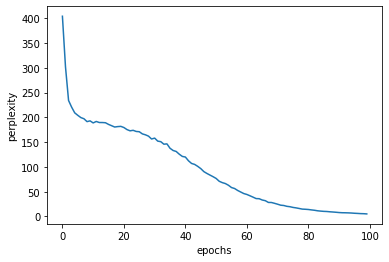

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
sys.path.append('./ch05')
from simple_rnnlm import SimpleRnnlm


# ハイパーパラメータの設定
batch_size = 10
wordvec_size = 100
hidden_size = 100
time_size = 5 
lr = 0.1
max_epoch = 100

# 学習データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 入力
ts = corpus[1:]  # 教師ラベル
data_size = len(xs)
print('corpus size: %d, vocabulary size: %d' % (corpus_size, vocab_size))

# 学習時の変数
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# モデルの生成
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# ミニバッチの各サンプルの読み込み開始位置を計算
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # ミニバッチの取得
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # パラメータの更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # perplexityの評価
    ppl = np.exp(total_loss / loss_count)
    print('| epoch %d | perplexity %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# グラフの描画
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list)
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


学習が行えていることが確認できた. コーパスのサイズを10000に変更して実行した.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
corpus size: 10000, vocabulary size: 2138
| epoch 1 | perplexity 720.05
| epoch 2 | perplexity 493.16
| epoch 3 | perplexity 459.39
| epoch 4 | perplexity 442.75
| epoch 5 | perplexity 430.49
| epoch 6 | perplexity 417.14
| epoch 7 | perplexity 400.28
| epoch 8 | perplexity 383.48
| epoch 9 | perplexity 367.79
| epoch 10 | perplexity 354.38
| epoch 11 | perplexity 342.15
| epoch 12 | perplexity 328.48
| epoch 13 | perplexity 314.89
| epoch 14 | perplexity 301.94
| epoch 15 | perplexity 289.14
| epoch 16 | perplexity 276.62
| epoch 17 | perplexity 263.42
| epoch 18 | perplexity 251.34
| epoch 19 | perplexity 239.90
| epoch 20 | perplexity 227.81
| epoch 21 | perplexity 216.15
| epoch 22 | perplexity 205.10
| epoch 23 | perplexity 194.58
| epoch 24 | perplexity 184.10
| epoch 25 | perplexity 174.72
| epoch 26 | perplexity 165.62
| epoch 27 | perplexity 156.36
|

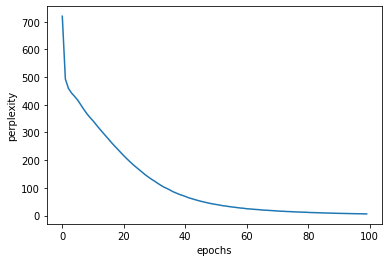

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch05')
from simple_rnnlm import SimpleRnnlm


# ハイパーパラメータの設定
batch_size = 10
wordvec_size = 100
hidden_size = 100
time_size = 5 
lr = 0.1
max_epoch = 100

# 学習データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 10000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 入力
ts = corpus[1:]  # 教師ラベル
data_size = len(xs)
print('corpus size: %d, vocabulary size: %d' % (corpus_size, vocab_size))

# 学習時の変数
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# モデルの生成
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# ミニバッチの各サンプルの読み込み開始位置を計算
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # ミニバッチの取得
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # パラメータの更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # perplexityの評価
    ppl = np.exp(total_loss / loss_count)
    print('| epoch %d | perplexity %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# グラフの描画
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list)
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


この程度なら学習が行えていることが分かる. これ以上桁を増やすとかなり時間がかかったので省略するが, 文庫本一冊の文字数が10~12万字なのでこの実装のままだと学習が上手く進まないと感じた.

#### 感想
RNNの理論は理解できた.　次週RNNを改善してその次は一番興味のある文章生成なので楽しみながらやりたいと思う.